In [1]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score, accuracy_score ,recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np # linear algebra
import pandas as pd # data processing
import plotly.graph_objs as go
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, auc, roc_auc_score,classification_report
import time
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/kdd-cup-1999-data/kddcup.data.gz
/kaggle/input/kdd-cup-1999-data/training_attack_types
/kaggle/input/kdd-cup-1999-data/kddcup.data.corrected
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled.gz
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled.gz
/kaggle/input/kdd-cup-1999-data/corrected.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.names
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected
/kaggle/input/kdd-cup-1999-data/typo-correction.txt
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled
/kaggle/input/kdd-cup-1999-data/corrected/corrected
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled/kd

## Loading the data which are kddcup.data_10_percent.gz and assigned thier datatypes

In [2]:
dtypes = {
"duration": np.int8,
"protocol_type": np.object,
"service": np.object,
"flag": np.object,
"src_bytes":  np.int8,
"dst_bytes":  np.int8,
"land": np.int8,
"wrong_fragment":  np.int8,
"urgent": np.int8,
"hot": np.int8,
"m_failed_logins":  np.int8,
"logged_in":  np.int8,
"num_compromised":  np.int8,
"root_shell":  np.int8,
"su_attempted":  np.int8,
"num_root": np.int8,
"num_file_creations":  np.int8,
"num_shells":  np.int8,
"num_access_files":  np.int8,
"num_outbound_cmds":  np.int8,
"is_host_login":  np.int8,
"is_guest_login":  np.int8,
"count": np.int8,
"srv_count":  np.int8,
"serror_rate": np.float16,
"srv_serror_rate": np.float16,
"rerror_rate": np.float16,
"srv_rerror_rate": np.float16,
"same_srv_rate": np.float16,
"diff_srv_rate": np.float16,
"srv_diff_host_rate": np.float16,
"dst_host_count":  np.int8,
"dst_host_srv_count":  np.int8,
"dst_host_same_srv_rate": np.float16,
"dst_host_diff_srv_rate": np.float16,
"dst_host_same_src_port_rate": np.float16,
"dst_host_srv_diff_host_rate": np.float16,
"dst_host_serror_rate": np.float16,
"dst_host_srv_serror_rate": np.float16,
"dst_host_rerror_rate": np.float16,
"dst_host_srv_rerror_rate": np.float16,
"label": np.object
}


## rename the name of the dataframe coulmns name using the names that were provided here in this link Plus adding the Lables coulmn  
               # http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
culmn_name = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","m_failed_logins",
"logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
"num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
"same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
"dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
"dst_host_srv_rerror_rate","label"]

train = pd.read_csv('/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz',compression='gzip', header=0, quotechar='"', sep=",", names=culmn_name, dtype=dtypes)
train.to_csv('./train.csv')

# **Data Preprocessing**

In [3]:
train.label.value_counts()

smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
duration                       494020 non-null int8
protocol_type                  494020 non-null object
service                        494020 non-null object
flag                           494020 non-null object
src_bytes                      494020 non-null int8
dst_bytes                      494020 non-null int8
land                           494020 non-null int8
wrong_fragment                 494020 non-null int8
urgent                         494020 non-null int8
hot                            494020 non-null int8
m_failed_logins                494020 non-null int8
logged_in                      494020 non-null int8
num_compromised                494020 non-null int8
root_shell                     494020 non-null int8
su_attempted                   494020 non-null int8
num_root                       494020 non-null int8
num_file_creations             494020 non-null int8

In [5]:
len(culmn_name)

42

In [6]:
train = pd.read_csv('./train.csv', header=None, names=culmn_name, low_memory=False)

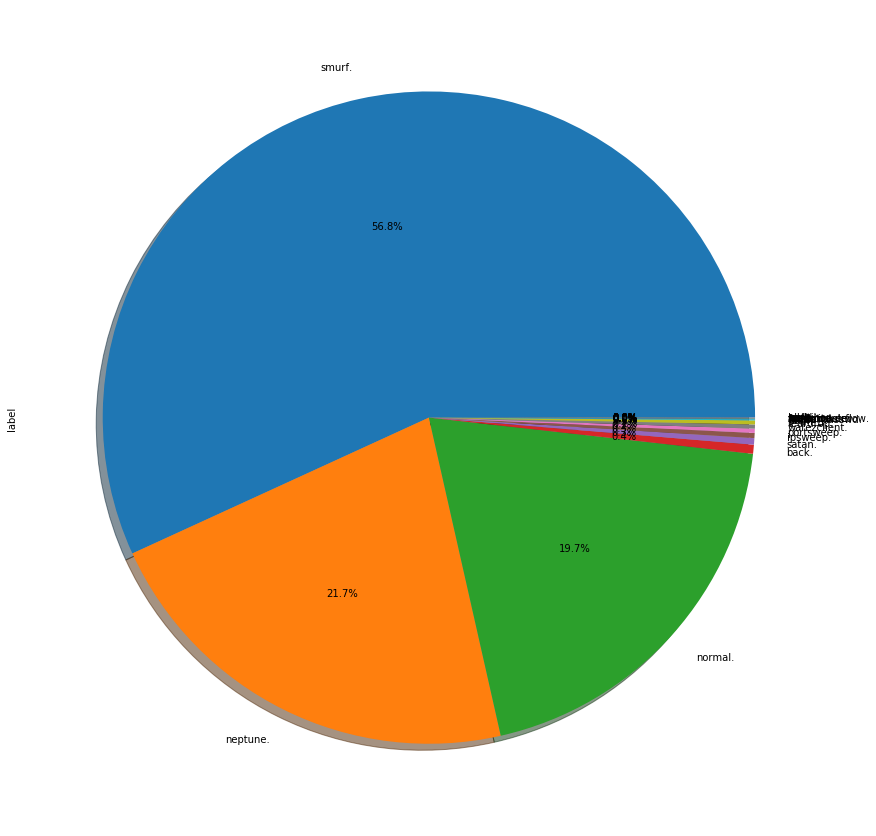

In [7]:
train =train .dropna()
train ['label'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(20,15))
plt.show()

In [8]:
train .describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
count,494021,494021,494021,494021,494021,494021,494021,494021,494021,494021,...,494021,494021,494021,494021,494021,494021,494021,494021,494021,494021
unique,257,4,67,12,257,257,3,4,5,23,...,257,102,102,102,66,101,73,102,102,24
top,0,icmp,ecr_i,SF,8,0,0,0,0,0,...,-1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
freq,481681,283602,281400,378439,282052,408508,493998,492782,494016,490828,...,337746,347827,347030,288883,441888,399809,400944,458791,459804,280790


In [9]:
train .head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
NaN,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0.0,0,tcp,http,SF,-17,-26,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1.0,0,tcp,http,SF,-21,57,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2.0,0,tcp,http,SF,-37,57,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3.0,0,tcp,http,SF,-39,-16,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [10]:
# 0 for normal data and 1 for melicious
train.label=train.label.apply(lambda x: 0 if x == 'normal.' else 1)

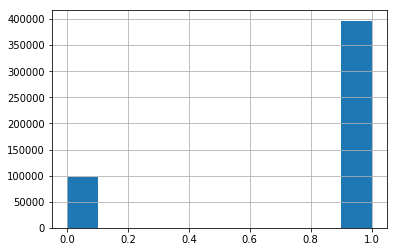

In [11]:
train['label'].hist()

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# extract categorical attributes from both training and test sets 
cat = train.select_dtypes(include=['object']).copy()
# encode the categorical attributes
traincat = cat.apply(encoder.fit_transform)

In [14]:
traincat.shape

(494021, 41)

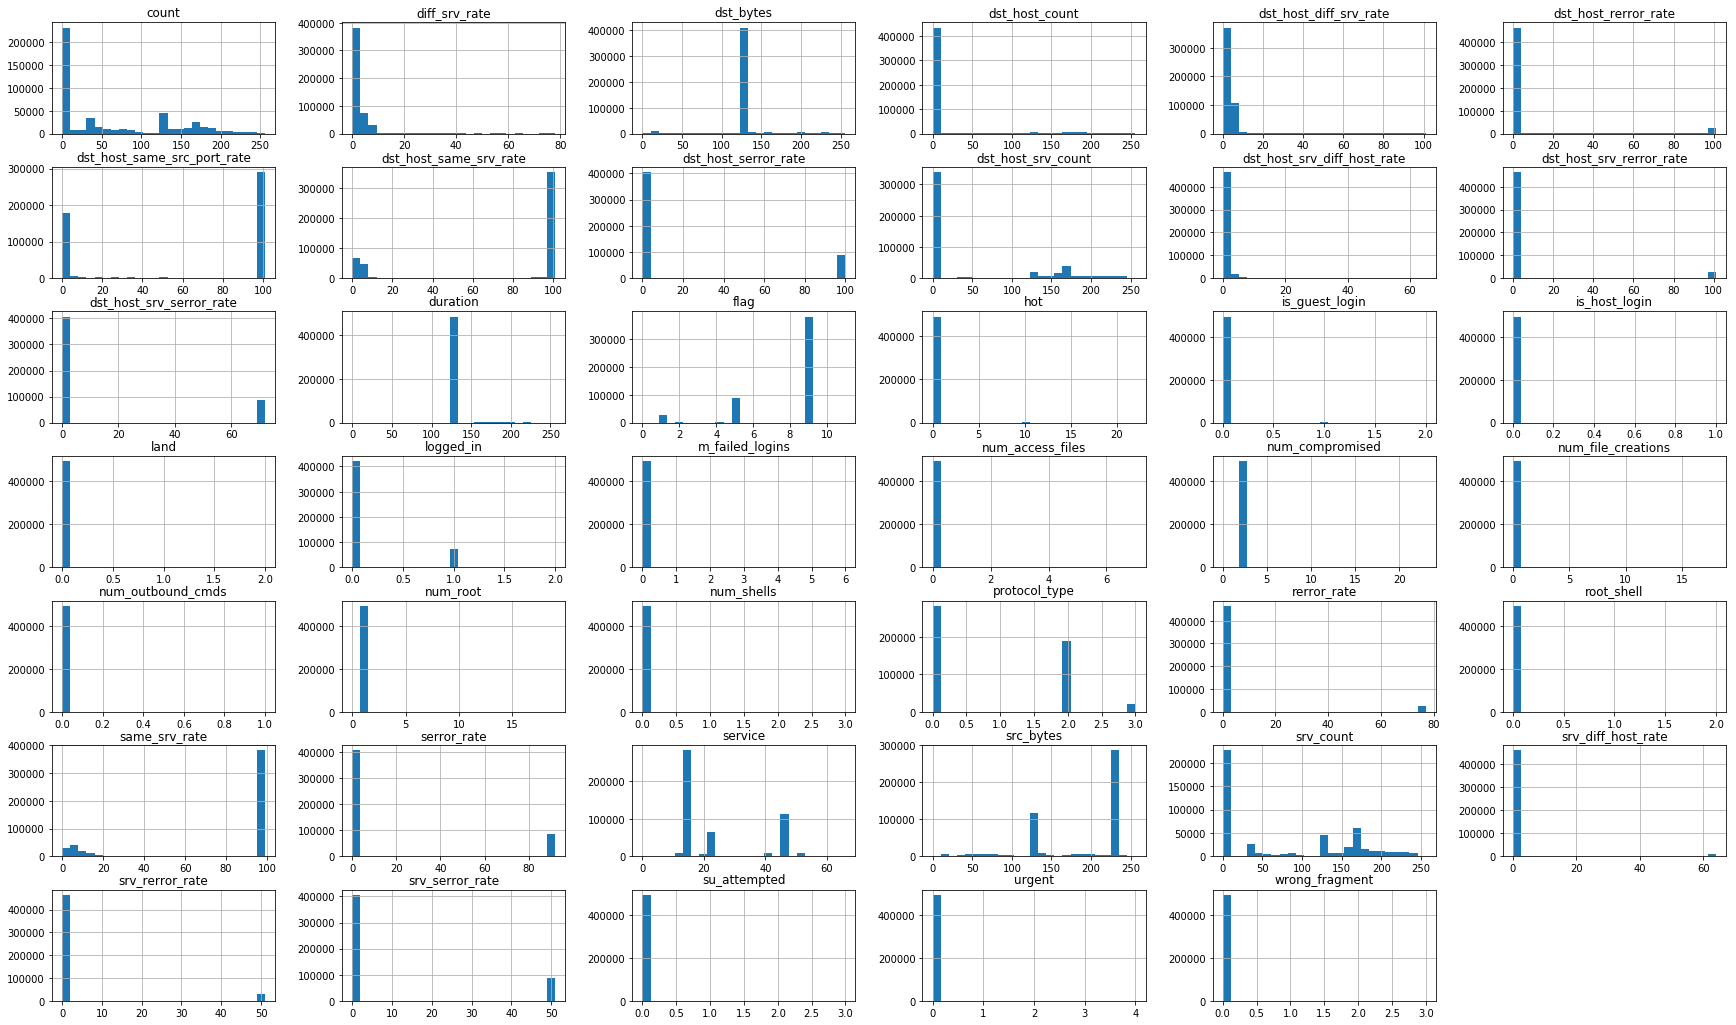

In [15]:
traincat.hist(bins=25, figsize=(30,18))
plt.show()

In [16]:
#Finding categorical features
num_cols = traincat._get_numeric_data().columns
cat_V = list(set(train.columns)-set(num_cols))
# cat_V.remove('lable')
cat_V

['label']

In [17]:
traincat.dtypes

duration                       int64
protocol_type                  int64
service                        int64
flag                           int64
src_bytes                      int64
dst_bytes                      int64
land                           int64
wrong_fragment                 int64
urgent                         int64
hot                            int64
m_failed_logins                int64
logged_in                      int64
num_compromised                int64
root_shell                     int64
su_attempted                   int64
num_root                       int64
num_file_creations             int64
num_shells                     int64
num_access_files               int64
num_outbound_cmds              int64
is_host_login                  int64
is_guest_login                 int64
count                          int64
srv_count                      int64
serror_rate                    int64
srv_serror_rate                int64
rerror_rate                    int64
s

In [18]:
# extract numerical attributes and scale it to have zero mean and unit variance  
numname = traincat.select_dtypes(include=['float16','int64']).columns
num=traincat[numname]

In [19]:
num

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
NaN,256,1,49,11,256,256,2,3,4,22,...,256,256,101,101,101,65,100,72,101,101
0.0,128,2,22,9,37,47,0,0,0,0,...,167,167,100,0,5,0,0,0,0,0
1.0,128,2,22,9,42,209,0,0,0,0,...,178,178,100,0,3,0,0,0,0,0
2.0,128,2,22,9,59,209,0,0,0,0,...,189,189,100,0,3,0,0,0,0,0
3.0,128,2,22,9,61,36,0,0,0,0,...,200,200,100,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015.0,128,2,22,9,206,244,0,0,0,0,...,241,0,100,0,1,5,0,1,0,0
494016.0,128,2,22,9,175,38,0,0,0,0,...,212,0,100,0,17,5,0,1,0,0
494017.0,128,2,22,9,77,107,0,0,0,0,...,164,0,100,0,6,5,6,1,0,0
494018.0,128,2,22,9,185,107,0,0,0,0,...,175,0,100,0,4,5,4,1,0,0


In [20]:
final_train=num
y_train = train['label']

In [21]:
type(final_train)
len(final_train)
final_train.head()
type(y_train)
y_train.head()

NaN    1
0.0    0
1.0    0
2.0    0
3.0    0
Name: label, dtype: int64

In [22]:
final_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
NaN,256,1,49,11,256,256,2,3,4,22,...,256,256,101,101,101,65,100,72,101,101
0.0,128,2,22,9,37,47,0,0,0,0,...,167,167,100,0,5,0,0,0,0,0
1.0,128,2,22,9,42,209,0,0,0,0,...,178,178,100,0,3,0,0,0,0,0
2.0,128,2,22,9,59,209,0,0,0,0,...,189,189,100,0,3,0,0,0,0,0
3.0,128,2,22,9,61,36,0,0,0,0,...,200,200,100,0,2,0,0,0,0,0


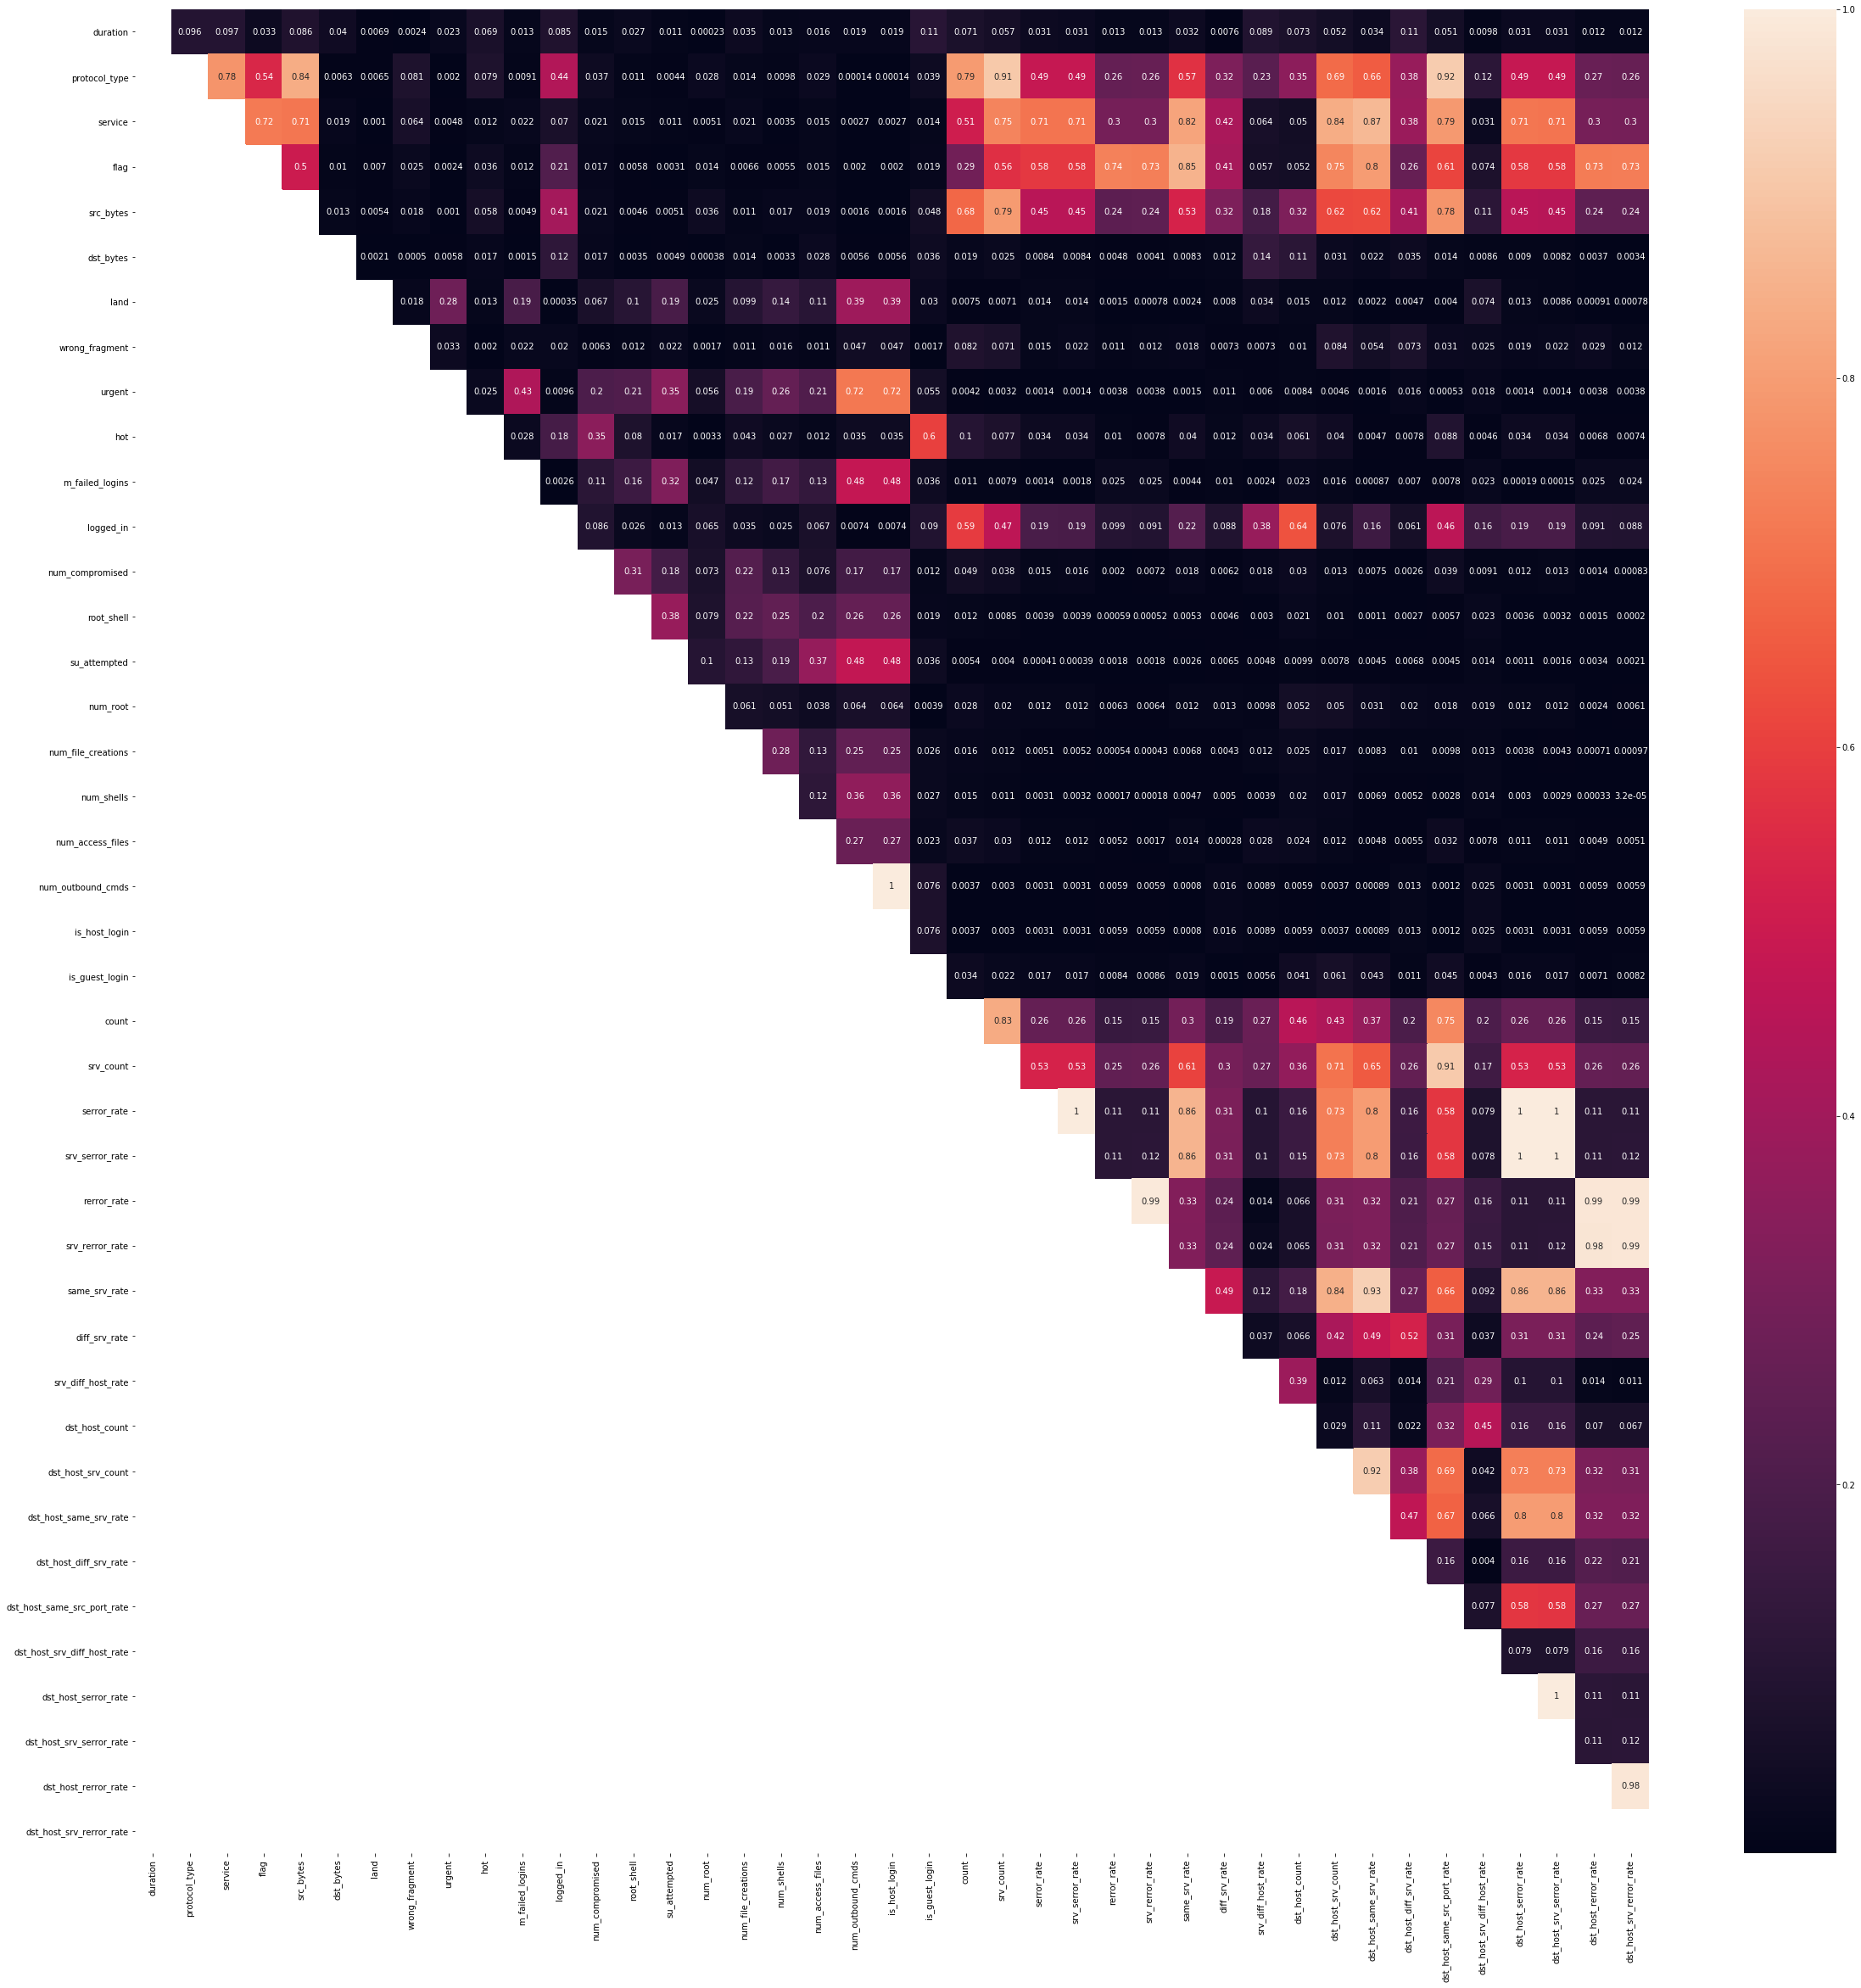

In [23]:
upper_tri = final_train.corr().abs()
upper_tri=upper_tri.where(np.triu(np.ones(upper_tri.shape),k=1).astype(np.bool))
fig, ax = plt.subplots(figsize=(40,40))
ax=sns.heatmap(upper_tri, annot=True)

# **Feature Engineer** 

In [24]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_jobs=-1,random_state=42)
rnd_clf.fit(final_train, y_train)
x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, final_train.columns), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 600, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [65]:
def evalution(model,X_train, X_test, Y_train, Y_test ):
    print("Training Accuracy :\t ",model.score(X_train, Y_train))
    print("Testing Accuracy :\t  ",  model.score(X_test, Y_test))
    y_pred = model.predict(X_test)
    r=recall_score( Y_test,y_pred)
    print("recall Accuracy :\t  ", r )
    print('Confusion matrix:\n ', confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    return r

In [66]:
y_train=np.array(y_train)


In [79]:
final_train.shape

(494021, 41)

In [80]:
final_train2=final_train.loc[:,s]
final_train2.shape

(494021, 13)

# Before Feature Selection

In [81]:
#split the dataset into training, Validation, and testing datasets with label stratified 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final_train= pd.DataFrame(scaler.fit_transform(final_train), columns = final_train.columns)
final_train2= pd.DataFrame(scaler.fit_transform(final_train2), columns = final_train2.columns)

X_train, X_test, Y_train, Y_test = train_test_split(final_train, y_train, train_size=0.7, random_state=42, stratify=y_train)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.8, random_state=42, stratify=Y_train)
print('shape of the training dataset ', X_train.shape)
print('shape of the validation dataset ', X_val.shape)
print('shape of the testing dataset ', X_test.shape)

shape of the training dataset  (276651, 41)
shape of the validation dataset  (69163, 41)
shape of the testing dataset  (148207, 41)


In [82]:
s=[]
for name, importance in zip(final_train.columns, rnd_clf.feature_importances_):
    if importance > 0.030 :
      s.append(name)
      print('"' + name + '"'+',')

"protocol_type",
"service",
"flag",
"src_bytes",
"dst_bytes",
"logged_in",
"count",
"srv_count",
"same_srv_rate",
"dst_host_count",
"dst_host_same_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",


In [93]:
def predect(model,X_train, y_train,X_val, Y_val):
    model.fit(X_train, y_train)

    #Scoring the model on train data
    print("Training Accuracy :\t ", model.score(X_train, y_train))

    #Scoring the model on test_data
    print("validation Accuracy :\t  ",  model.score(X_val, Y_val))

    y_pred = model.predict(X_val)
    acc=accuracy_score(Y_val, y_pred)
    print(acc)
    #print('ROC-AUC score', roc_auc_score(y_test,y_pred))
    print('classification report:\n ',classification_report(Y_val, y_pred))
    conf_matrix = confusion_matrix(Y_val, y_pred)

    sns.heatmap(conf_matrix, annot=True, fmt="3g")
    plt.show()
    return y_pred,acc

In [94]:
dt_model =  DecisionTreeClassifier()
rf_model = RandomForestClassifier( n_jobs=-1)
ada_boost_model = AdaBoostClassifier()
bagging_model = BaggingClassifier()
extra_trees_model = ExtraTreesClassifier()
ensemble_clf=[ dt_model, rf_model, ada_boost_model, 
       bagging_model,extra_trees_model,]

#############################DecisionTreeClassifier#############################
Training Accuracy :	  1.0
validation Accuracy :	   0.9994794904790133
0.9994794904790133
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     13619
           1       1.00      1.00      1.00     55544

    accuracy                           1.00     69163
   macro avg       1.00      1.00      1.00     69163
weighted avg       1.00      1.00      1.00     69163



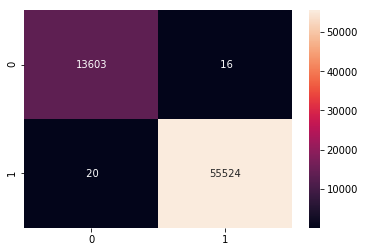

#############################RandomForestClassifier#############################
Training Accuracy :	  1.0
validation Accuracy :	   0.9997831210329222
0.9997831210329222
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     13619
           1       1.00      1.00      1.00     55544

    accuracy                           1.00     69163
   macro avg       1.00      1.00      1.00     69163
weighted avg       1.00      1.00      1.00     69163



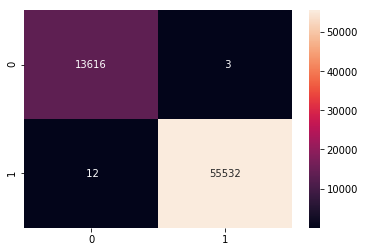

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.9974191309628376
validation Accuracy :	   0.9972528664170148
0.9972528664170148
classification report:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99     13619
           1       1.00      1.00      1.00     55544

    accuracy                           1.00     69163
   macro avg       1.00      1.00      1.00     69163
weighted avg       1.00      1.00      1.00     69163



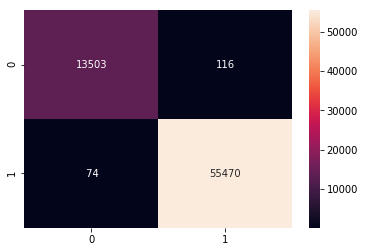

#############################BaggingClassifier#############################
Training Accuracy :	  0.9999566240497956
validation Accuracy :	   0.9996963694460911
0.9996963694460911
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     13619
           1       1.00      1.00      1.00     55544

    accuracy                           1.00     69163
   macro avg       1.00      1.00      1.00     69163
weighted avg       1.00      1.00      1.00     69163



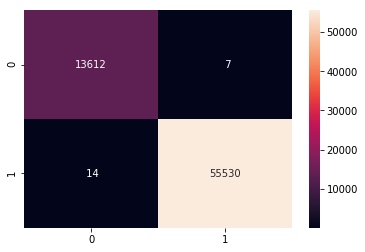

#############################ExtraTreesClassifier#############################
Training Accuracy :	  1.0
validation Accuracy :	   0.9997397452395067
0.9997397452395067
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     13619
           1       1.00      1.00      1.00     55544

    accuracy                           1.00     69163
   macro avg       1.00      1.00      1.00     69163
weighted avg       1.00      1.00      1.00     69163



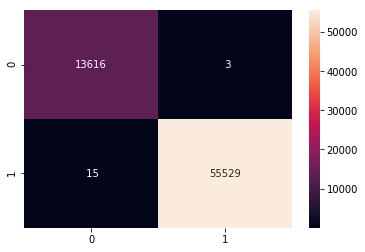

In [95]:
for i in range(len(ensemble_clf)):

        print('#############################'+str(type(ensemble_clf[i]).__name__)+'#############################')
        y_pred,acc=predect(ensemble_clf[i],X_train, Y_train,X_val, Y_val)


# After Feature Selection

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(final_train2, y_train, train_size=0.7, random_state=42, stratify=y_train)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.8, random_state=42, stratify=Y_train)
print('shape of the training dataset ', X_train.shape)
print('shape of the validation dataset ', X_val.shape)
print('shape of the testing dataset ', X_test.shape)

shape of the training dataset  (276651, 13)
shape of the validation dataset  (69163, 13)
shape of the testing dataset  (148207, 13)


In [97]:
def prediect(model,X_train, Y_train,X_test, Y_test):
    model.fit(X_train, Y_train)

    #Scoring the model on train data
    print("Training Accuracy :\t ", model.score(X_train, Y_train))

    #Scoring the model on test_data
    print("Testing Accuracy :\t  ",  model.score(X_test, Y_test))

    y_pred = model.predict(X_test)
    acc=accuracy_score(Y_test, y_pred)
    print(acc)
    #print('ROC-AUC score', roc_auc_score(y_test,y_pred))
    print('classification report:\n ',classification_report(Y_test, y_pred))
    conf_matrix = confusion_matrix(Y_test, y_pred)

    sns.heatmap(conf_matrix, annot=True, fmt="3g")
    plt.show()
    return ypred,acc

#############################DecisionTreeClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.9994939510279541
0.9994939510279541
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     29183
           1       1.00      1.00      1.00    119024

    accuracy                           1.00    148207
   macro avg       1.00      1.00      1.00    148207
weighted avg       1.00      1.00      1.00    148207



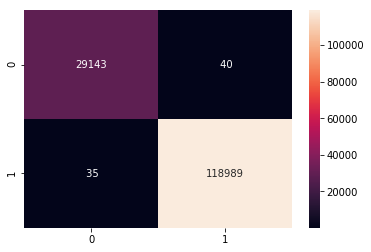

#############################RandomForestClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.9996558866990088
0.9996558866990088
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     29183
           1       1.00      1.00      1.00    119024

    accuracy                           1.00    148207
   macro avg       1.00      1.00      1.00    148207
weighted avg       1.00      1.00      1.00    148207



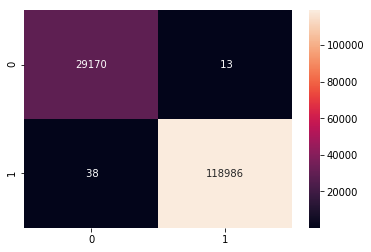

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.9957491568799679
Testing Accuracy :	   0.9959651028628878
0.9959651028628878
classification report:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99     29183
           1       1.00      1.00      1.00    119024

    accuracy                           1.00    148207
   macro avg       0.99      0.99      0.99    148207
weighted avg       1.00      1.00      1.00    148207



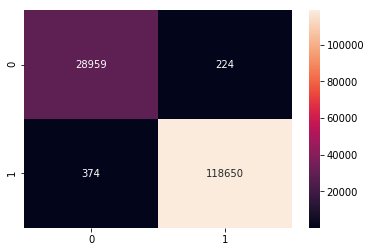

#############################BaggingClassifier#############################
Training Accuracy :	  0.9999746973623808
Testing Accuracy :	   0.9995546769045996
0.9995546769045996
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     29183
           1       1.00      1.00      1.00    119024

    accuracy                           1.00    148207
   macro avg       1.00      1.00      1.00    148207
weighted avg       1.00      1.00      1.00    148207



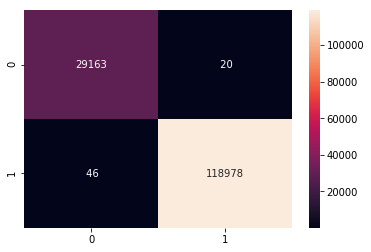

#############################ExtraTreesClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.9996086554616179
0.9996086554616179
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     29183
           1       1.00      1.00      1.00    119024

    accuracy                           1.00    148207
   macro avg       1.00      1.00      1.00    148207
weighted avg       1.00      1.00      1.00    148207



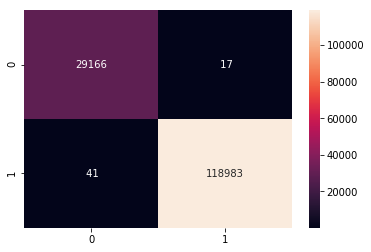

In [98]:
for i in range(len(ensemble_clf)):

        print('#############################'+str(type(ensemble_clf[i]).__name__)+'#############################')
        ypred,acc=prediect(ensemble_clf[i],X_train, Y_train,X_test, Y_test)

In [179]:
def divse():
        if torch.cuda.is_available():
            device = "cuda"
        else:
            device = "cpu"
        print(f"Using device {device}")
        return device
divse()

Using device cuda


'cuda'

In [182]:
df_train = pd.concat([pd.DataFrame(final_train2), pd.DataFrame(y_train)],axis=1, ignore_index = True).astype(float)
# df_train.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","m_failed_logins", 
#                             "logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
#                             "num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
#                             "same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
#                             "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
#                             "dst_host_srv_rerror_rate","label"]
df_train.columns = ["protocol_type","service","flag","src_bytes","dst_bytes","logged_in","count","srv_count","same_srv_rate","dst_host_count","dst_host_same_srv_rate",
                    "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","label"]

df_train.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label
0,0.333333,0.742424,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
1,0.666667,0.333333,0.818182,0.144531,0.183594,0.5,0.914062,0.914062,0.989899,0.652344,0.990099,0.049505,0.0,0.0
2,0.666667,0.333333,0.818182,0.164062,0.816406,0.5,0.914062,0.914062,0.989899,0.695312,0.990099,0.029703,0.0,0.0
3,0.666667,0.333333,0.818182,0.230469,0.816406,0.5,0.828125,0.828125,0.989899,0.738281,0.990099,0.029703,0.0,0.0
4,0.666667,0.333333,0.818182,0.238281,0.140625,0.5,0.828125,0.828125,0.989899,0.781250,0.990099,0.019802,0.0,0.0


In [183]:
df_train=df_train[df_train.label==0]

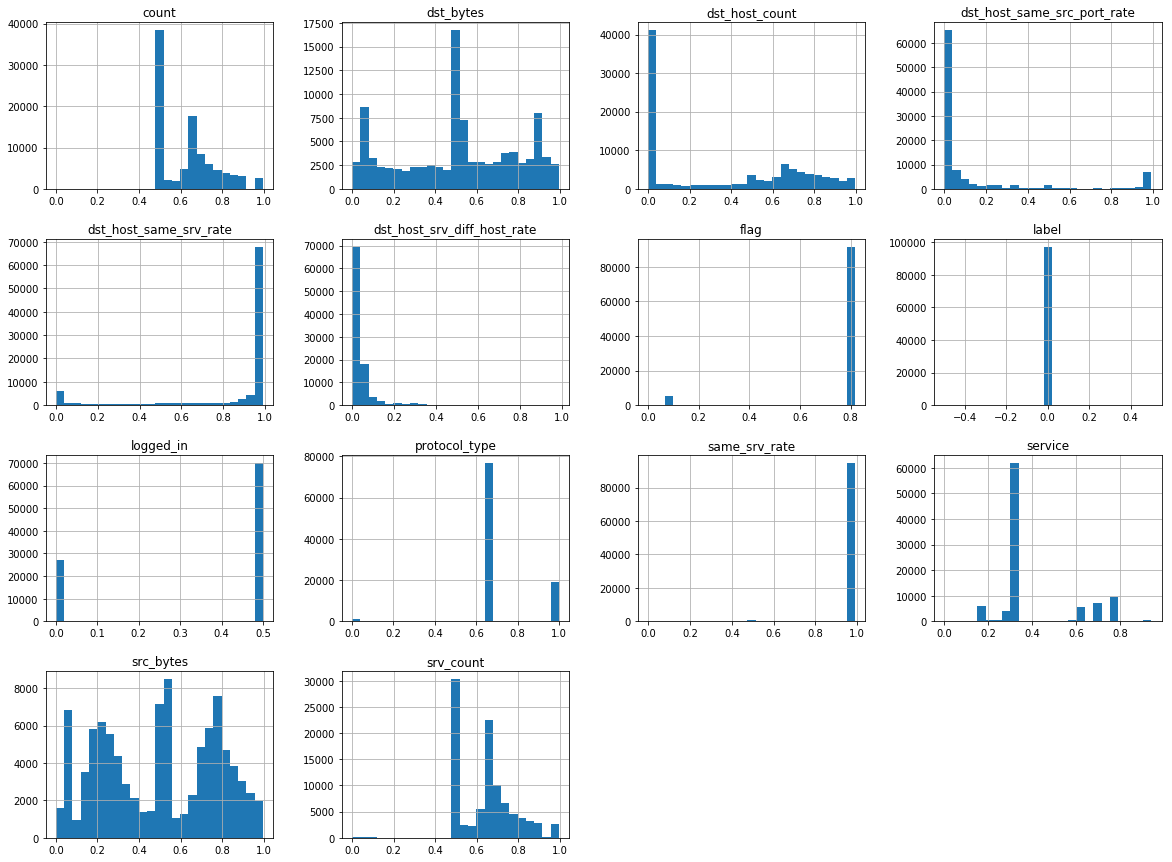

In [184]:
df_train.hist(bins=25, figsize=(20,15))
plt.show()

## **Here we will be Implementing the DCGan algorithm**

In [185]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(16))
    assert model.output_shape == (None, 16) # Note: None is the batch size
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(13))
#     assert model.output_shape == (None,8 )
    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=[None,13]))
   
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(32, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(1))
   # model.add(layers.Softmax())

    return model

In [186]:
generator=make_generator_model()
discriminator=make_discriminator_model()

In [187]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [188]:
def discriminator_loss(real_data, fake_data):
    real_loss = cross_entropy(tf.ones_like(real_data), real_data)
    fake_loss = cross_entropy(tf.zeros_like(fake_data), fake_data)
    total_loss = real_loss + fake_loss
    return total_loss

In [189]:
cross_entropy_binary = tf.keras.losses.BinaryCrossentropy()
loss = cross_entropy_binary([1., 1., 1., 1.], [1., 1., 1., 1.])
print('Loss: ', loss.numpy()) 

Loss:  -0.0


In [190]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [191]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [201]:
epochs = 2
noise_dim = 100
#num_examples_to_generate = 16
BATCH_SIZE = 10000



In [202]:
@tf.function
def train_step(tapular):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    tapular=tf.reshape(tapular, (1,13))
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_data = generator(noise, training=True)

      real_output = discriminator(tapular, training=True)
      fake_output = discriminator(generated_data, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
     
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return (gen_loss,disc_loss)

In [203]:
history=dict()
history['gen']=[]
history['dis']=[]
def train_data(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:
           gen_loss, dis_loss= train_step(batch)
        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))

In [204]:
x_train=df_train.iloc[:,:-1].values.astype("float64")
train_data(x_train,epochs) 

Time for epoch 1 is 234.14035820960999 sec 
Time for epoch 2 is 232.16137409210205 sec 


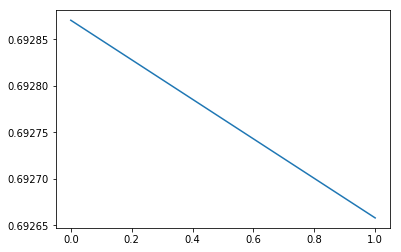

In [205]:
plt.plot(history['gen'])

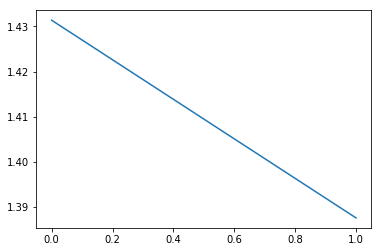

In [206]:
plt.plot(history['dis'])

In [208]:
y_test=df_train.label
x_test=df_train.drop('label',axis=1).values.reshape(-1,1,13)

In [209]:
y_pred=discriminator.predict(x_test)

Text(0, 0.5, 'y_pred')

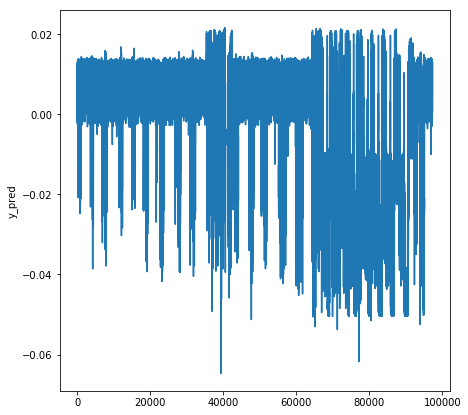

In [210]:
#range of output value
plt.figure(figsize=(7,7))
plt.plot(range(len(y_pred)),y_pred.reshape(-1,1))
plt.ylabel('y_pred')

In [218]:
#looking for the optimal probability threshold
# prob=[0.5,0.55,0.6,0.65,0.75,0.8,0.85,0.9,0.95,1,2,2.5,5]
prob=[-0.2,-0.1,-0.05,0,0.005,0.000006]

# prob=[1,10,50,100,0.005,0.1]
for p in prob:
    pred_value =[1 if i<p   else 0 for i in y_pred]
    f1=f1_score(y_test,pred_value)
    acc=accuracy_score(y_test,pred_value)
    precision=average_precision_score(y_test,pred_value)
    recall= recall_score(y_test,pred_value)
    print(f'At prob ={p} and the accuracy={acc}  \n')
    print(f'The pred_value.count(0)={pred_value.count(0)} : and the pred_value.count(1)={pred_value.count(1)}\n')

At prob =-0.2 and the accuracy=1.0  

The pred_value.count(0)=97277 : and the pred_value.count(1)=0

At prob =-0.1 and the accuracy=1.0  

The pred_value.count(0)=97277 : and the pred_value.count(1)=0

At prob =-0.05 and the accuracy=0.977404730820235  

The pred_value.count(0)=95079 : and the pred_value.count(1)=2198

At prob =0 and the accuracy=0.6663651222796756  

The pred_value.count(0)=64822 : and the pred_value.count(1)=32455

At prob =0.005 and the accuracy=0.37866093732331385  

The pred_value.count(0)=36835 : and the pred_value.count(1)=60442

At prob =6e-06 and the accuracy=0.6663342825128242  

The pred_value.count(0)=64819 : and the pred_value.count(1)=32458



The best threshold value is prob = 0;

While GAN is widely used in computer vision problem, it does perform very well in tabular data. One of the most common problem in anomaly detection is class imbalance. While using GAN, we indirectly overcome the problem as we only training our model with just one of the classes. Besides, we only training our model with just 500 data which is a very small amount when comparing to the data required by other ML/DL models.

If you find out any mistakes in my notebook, pls let me know.

Reference : https://www.tensorflow.org/tutorials/generative/dcgan